# Logistic regression

In this notebook, we discuss how to fit and evaluate logistic regression models in Python.

We will use the Heart dataset, which was downloaded from the UCI Machine Learning repository.

In [1]:
# Import data
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The target variable is called `target`, and we want to use all remaining variables to try to predict it.

In [2]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop('target', axis = 1)
y = df.target

# We specify the random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,
                                                   random_state = 1234)

First, let's start with a basic linear regression without any regularization. We do this by specifiying `penalty = "none"`.

We also need to increase the maximum number of iterations, as the model doesn't converge with the default value (try removing `max_iter = 1000` to see what happens).

In [3]:
# Fit Logistic Regression without regularization
from sklearn.linear_model import LogisticRegression

model_noreg = LogisticRegression(penalty = "none",
                                 max_iter = 1000) # Increase to reach convergence
model_noreg.fit(X_train, y_train)

# Get predicted values
y_pred_noreg = model_noreg.predict(X_test)

### Exercise

Compute the Brier score (also known as the MSE).

In [4]:
# Write your code here




Next, we can try fitting a logistic regression model with L1 regularization. This is the same idea as Lasso regression, but applied to logistic regression instead of linear regression. We do this by specifying `penalty = "l1"`.

Note that we increased even more the maximum number of iterations, and that we also need to specify a different solver (i.e. algorithm). The default one is L-BFGS, which is gradient-based approach that requires the objective function to be differentiable everywhere. As we discussed in class, the L1 penalty is not differentiable at 0, and therefore we need to use a different algorithm. In this case, we use SAGA, which is appropriate for L1 penalty.

One last important observation: we use the default value of lambda = 1.0, but you can change that by changing the parameter `C` of `LogisticRegression`, but careful: it's actually the inverse of lambda! (So smaller values of `C` lead to more regularization.) 

In [5]:
# Fit Logistic Regression with L1 regularization
from sklearn.linear_model import LogisticRegression

model_reg = LogisticRegression(penalty = "l1",
                               max_iter = 5000, # Increase to reach convergence
                               solver = 'saga') # Default doesn't work for lasso
model_reg.fit(X_train, y_train)
y_pred_reg = model_reg.predict(X_test)

Recall that L1 regularization leads to variable selection. We can see that from the coefficient estimates:

In [6]:
model_reg.coef_

array([[ 8.60518143e-05, -3.25086515e-01,  5.40401205e-01,
        -1.48357465e-02, -2.92890322e-03,  0.00000000e+00,
         7.20623341e-02,  2.70658978e-02, -2.75521024e-01,
        -4.58576539e-01,  1.68299846e-01, -4.60808700e-01,
        -3.40865629e-01]])

### Exercise

Compute the Brier score of this second model. Which model has the best performance?

In [7]:
# Write your code below




## Plotting evaluation curves

We can also use `scikit-learn` to plot both the ROC curve and the precision-recall curve.

A small note: when `scikit-learn 1.0` was released a few months ago, they deprecated the approach below. So the code may generate warnings for you if you have a recent version of the library. To see how these curves should be generated in the new version, see the documentation.

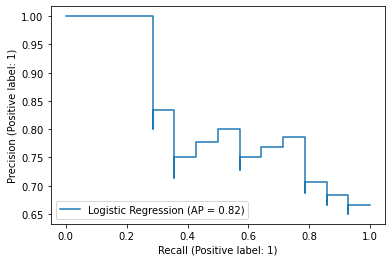

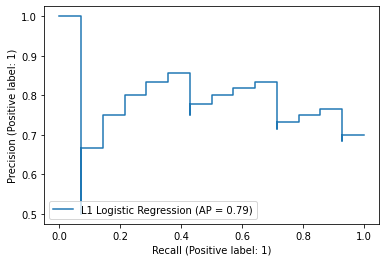

In [8]:
# Use sklearn to plot precision-recall curves
# Note: This approach is deprecated in the most recent version
#       of scikit-learn.
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(model_noreg, X_test, y_test, 
                            name = 'Logistic Regression')
plot_precision_recall_curve(model_reg, X_test, y_test, 
                            name = 'L1 Logistic Regression')


As we can see, the graphs are also accompanied by a metric, the **Average Precision** (AP). As its name suggests, this is the average precision as we change the value of the threshold; a higher value corresponds to a better performance.

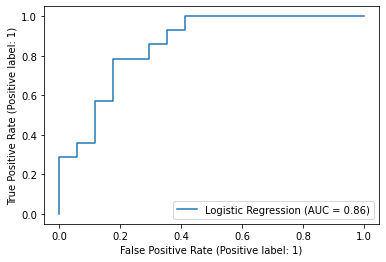

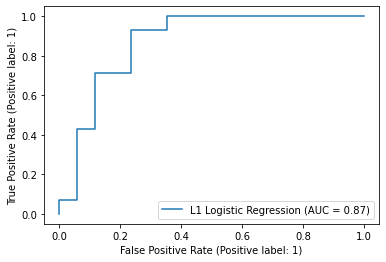

In [9]:
# Use sklearn to plot ROC curves
# Note: This approach is deprecated in the most recent version
#       of scikit-learn.
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_noreg, X_test, y_test, 
               name = 'Logistic Regression')
plot_roc_curve(model_reg, X_test, y_test, 
               name = 'L1 Logistic Regression')

We also get the AUC values as part of the display.

### Challenge Exercise

Unlike basic (i.e. non-regularized) logistic regression, L1 logistic regression is not invariant to rescaling of the features. In fact, it is recommended to standardize the features before fitting the model.

Use `scikit-learn` to standardize the data before splitting into test and training datasets (you want to perform the same transformation on both datasets). Then fit L1 logistic regression again, and compute the same metrics as above. Do you get better performance?